In [1]:
%cd ..
from sklearn.datasets import load_digits
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import seaborn as sns
from src.linear import Linear
from src.loss import *
from src.activation import TanH, Sigmoid, Softmax
from src.encapsulation import Sequential, Optim
np.random.seed(42)

/mnt/48566869-e5b1-482e-907d-2c513d1afe25/Documents/NeuralNetworksDIY


In [2]:
batch_size = 8
X, y = load_digits(return_X_y=True, n_class=2)
y_oh = OneHotEncoder().fit_transform(y.reshape(-1, 1)).toarray()

net = Sequential(
    Linear(64, 32),
    TanH(),
    Linear(32, 16),
    TanH(),
    Linear(16, 8),
    TanH(),
    Linear(8, 2),
    Sigmoid(),
    # Softmax(),
)


100%|██████████| 50/50 [00:00<00:00, 135.66it/s]


1.0


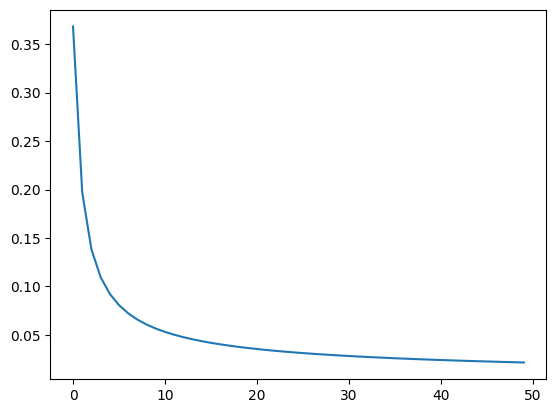

In [3]:
optimizer = Optim(net.reset(), CrossEntropyLoss(), eps=1e-2)
lossList = optimizer.SGD(X, y_oh, batch_size, 50)
pd.Series(lossList).plot()
print(optimizer.score(X, y))


100%|██████████| 50/50 [00:00<00:00, 185.25it/s]


<Axes: xlabel='epoch', ylabel='loss'>

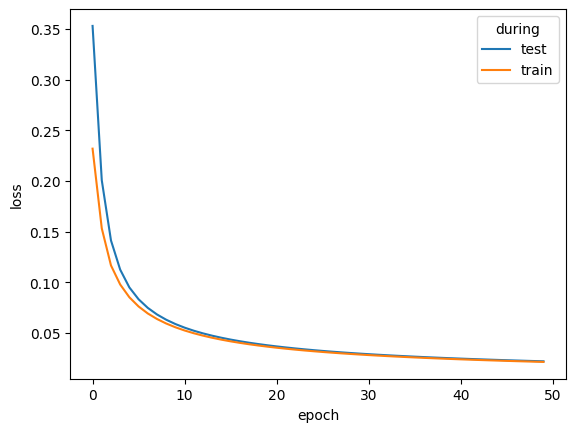

In [4]:
optimizer = Optim(net.reset(), CrossEntropyLoss(), eps=1e-2)
loss_df = optimizer.SGD_eval(
    X, y_oh, batch_size, 50, test_size=8, return_dataframe=True
)
loss_long_df = pd.melt(
    loss_df,
    id_vars="epoch",
    value_vars=["loss_test", "loss_train"],
    value_name="loss",
    var_name="during",
).replace({"loss_test": "test", "loss_train": "train"})
sns.lineplot(loss_long_df, x="epoch", y="loss", hue="during")


0.3861111111111111


100%|██████████| 100/100 [00:00<00:00, 143.88it/s]


0    0.375
1    0.375
2    0.375
3    0.375
4    0.375
Name: score_test, dtype: float64

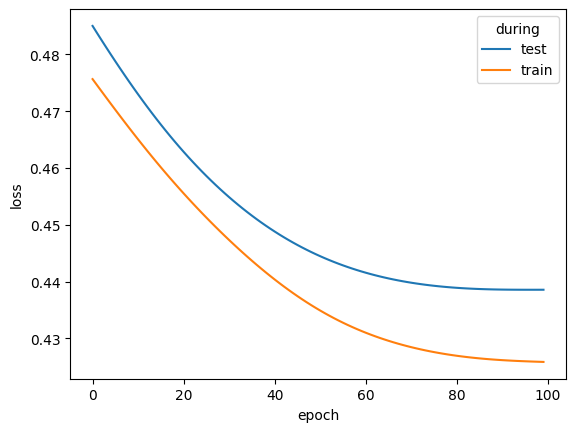

In [7]:
optimizer = Optim(net.reset(), CrossEntropyLoss(), eps=1e-5)
print(optimizer.score(X, y))
loss_df = optimizer.SGD_eval(X, y_oh, batch_size, 100, test_size=8, return_dataframe=True)
loss_long_df = pd.melt(loss_df, id_vars='epoch', value_vars=['loss_test', 'loss_train'], value_name='loss', var_name='during').replace({'loss_test': 'test', 'loss_train': 'train'})
sns.lineplot(loss_long_df, x='epoch', y='loss', hue='during')
loss_df['score_test'].head()

In [ ]:
loss_df

,epoch,loss_test,loss_train,score_train,score_test
0,0,0.011989,0.012073,1.0,1.0
1,1,0.011948,0.012031,1.0,1.0
2,2,0.011907,0.011990,1.0,1.0
3,3,0.011866,0.011948,1.0,1.0
4,4,0.011826,0.011907,1.0,1.0
5,5,0.011786,0.011867,1.0,1.0
6,6,0.011747,0.011827,1.0,1.0
7,7,0.011708,0.011787,1.0,1.0
8,8,0.011670,0.011748,1.0,1.0
9,9,0.011631,0.011709,1.0,1.0
